# Cohort Analysis

In [1]:
# Import important libraries 
import pandas as pd 
import numpy as np 

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

# Import machine learning libraries
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
df = pd.read_csv("../Cohort_Analysis/Dataset_ecommerce.csv")
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
# Descriptive Statistics
df.describe(include='all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [4]:
# Check for missing values
# (df.isnull().mean() * 100).round(2) # Percentage of missing values
df.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [5]:
# Drop missing values
df.dropna(inplace=True)

# Check for missing values
# df.isnull().sum()

In [6]:
# Check for info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [7]:
# Convert the datatype of the InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# df.info()

## Exploratory Data Analysis

*Analysis by Country*

In [8]:
quantity_by_country = df.groupby(['Country'])['Quantity'].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()
quantity_by_country.head()

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


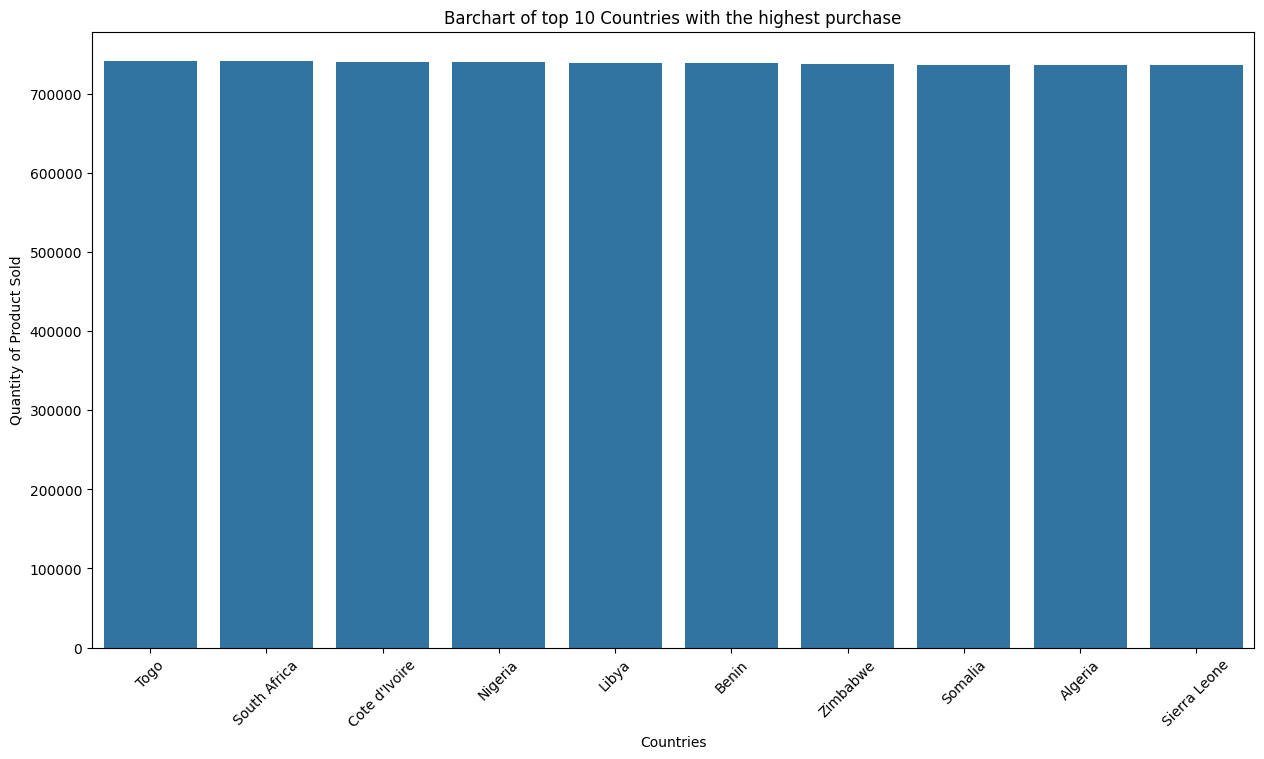

In [9]:
# Top 10 Countries with the highest quantity of items sold
top_10_country = quantity_by_country.head(10)

# Visualize
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Country', y='Quantity', data=top_10_country)
plt.title('Barchart of top 10 Countries with the highest purchase')
plt.xlabel('Countries')
plt.ylabel('Quantity of Product Sold')
plt.xticks(rotation=45)
plt.show()

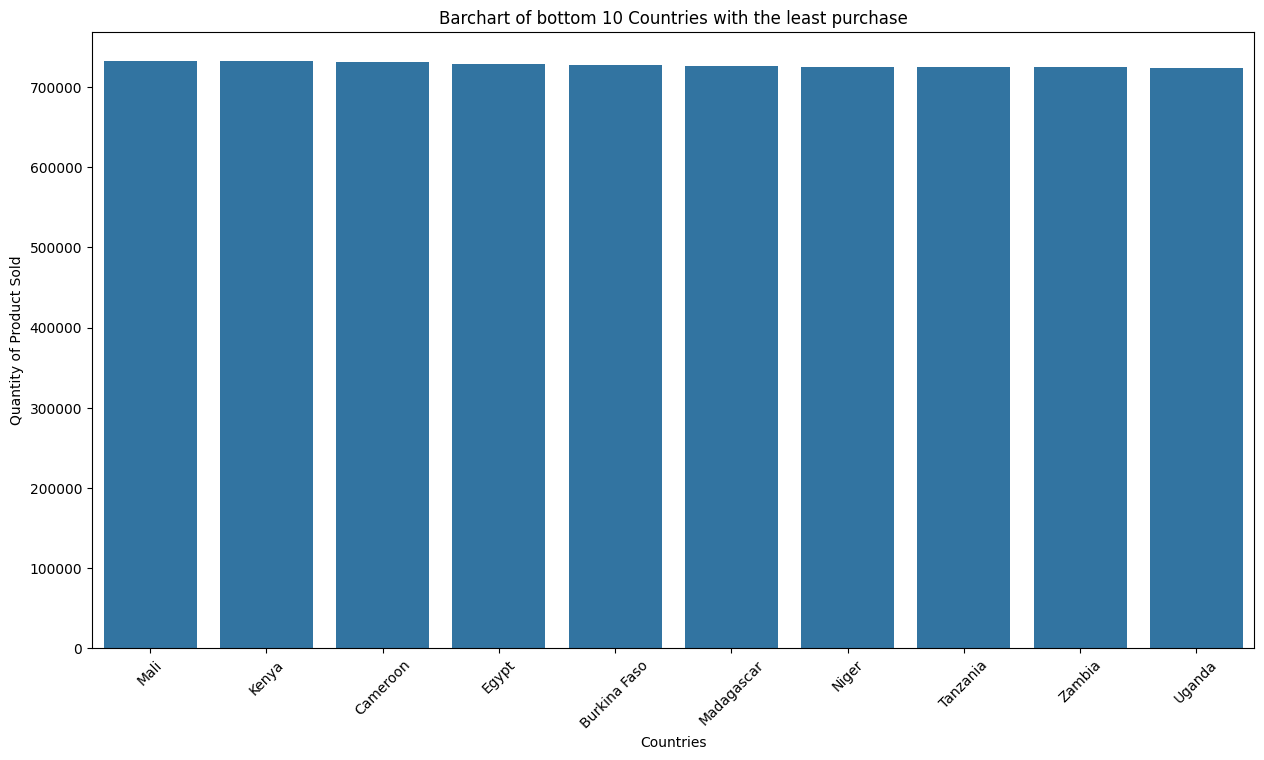

In [10]:
# Least 10 Countries with the lowest quantity of items sold
least_10_country = quantity_by_country.tail(10)

# Visualize
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Country', y='Quantity', data=least_10_country)
plt.title('Barchart of bottom 10 Countries with the least purchase')
plt.xlabel('Countries')
plt.ylabel('Quantity of Product Sold')
plt.xticks(rotation=45)
plt.show()

*Analysis of countries and number of customers*

In [11]:
# Countries with the highest number of customers
customer_by_country = df.groupby(['Country'])['CustomerID'].nunique().reset_index()
customer_by_country = customer_by_country.sort_values("CustomerID", ascending=False).reset_index()
customer_by_country.head()

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049


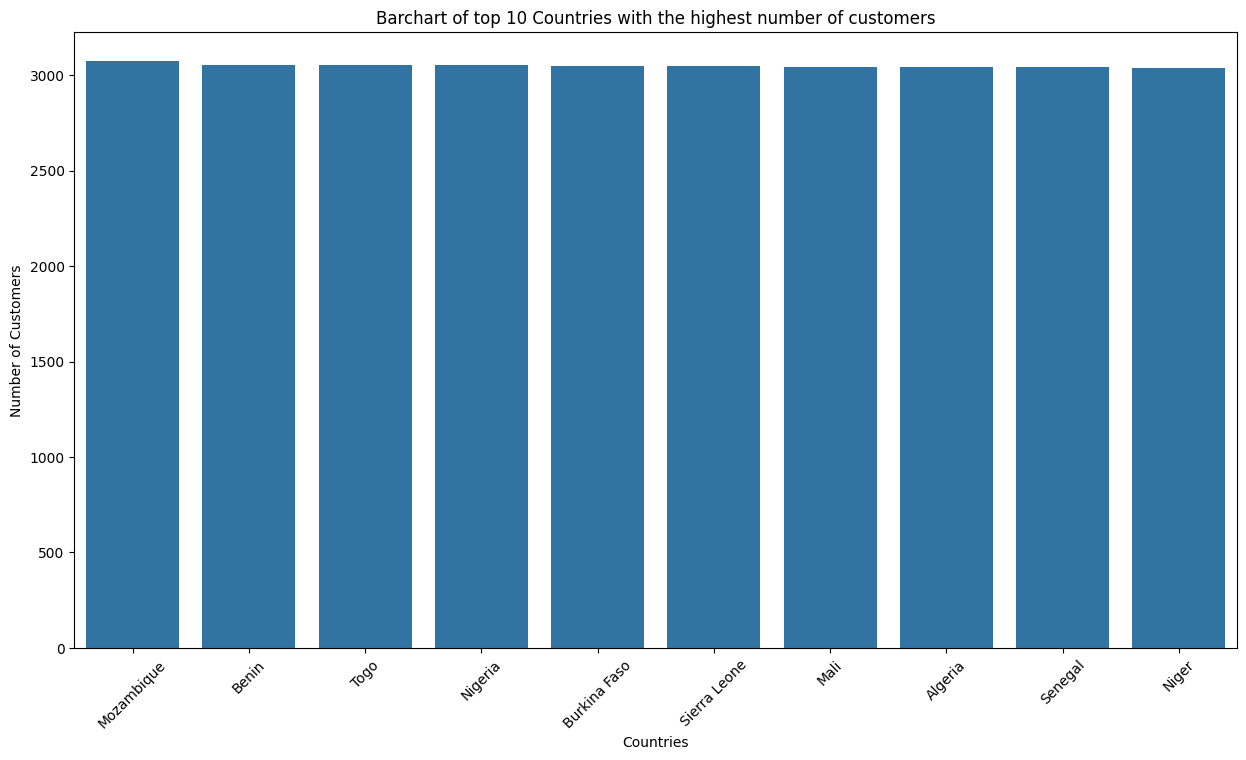

In [12]:
# Visualize
customer_by_country = customer_by_country.head(10)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Country', y='CustomerID', data=customer_by_country)
plt.title('Barchart of top 10 Countries with the highest number of customers')
plt.xlabel('Countries')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

*Sales Trend Visualization*

In [17]:
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()
# monthly_sales.head()

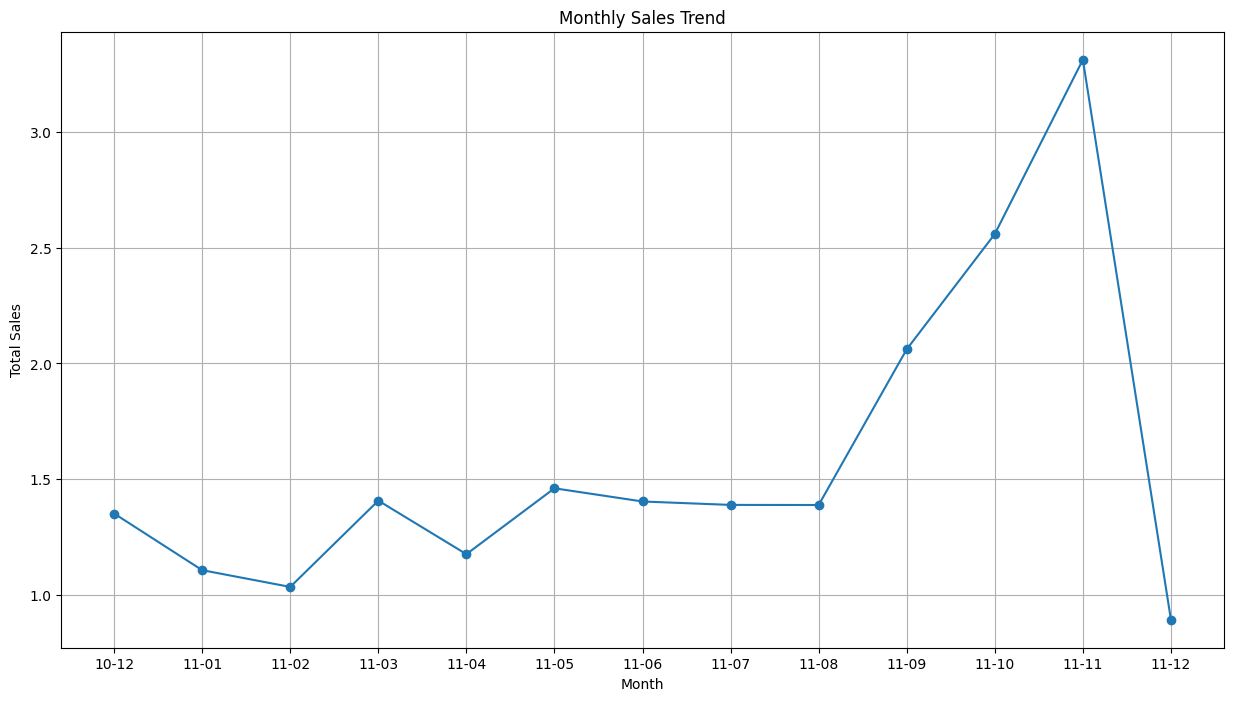

In [24]:
# Create a line plot
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales.index.strftime("%y-%m"), (monthly_sales.values)/1e6, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
# plt.xticks(rotation=45)
plt.grid(True)
plt.show()

*Cohort Analysis*

In [25]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [28]:
# Function to extract the year and month from the InvoiceDate
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

# Create a new column for the InvoiceMonth
df['InvoiceDate'] = df['InvoiceDate'].apply(get_month)
# df.head()

In [42]:
# First date the customer makes purchase
def get_cohort_date(df):
    df["cohort_date"] = df.groupby("CustomerID")["InvoiceDate"].transform("min")
    return df["cohort_date"]

In [43]:
df["cohort_date"] = get_cohort_date(df)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


## Cohort Index

In [34]:
# Function to extract the year and month from the InvoiceDate
def get_year_month(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    return year, month

In [36]:
first_month, first_year = get_year_month(df, "cohort_date")
first_month

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort_date, Length: 406829, dtype: int32

In [37]:
first_year

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort_date, Length: 406829, dtype: int32

In [38]:
latest_month, latest_year = get_year_month(df, "InvoiceDate")

In [39]:
latest_month

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [40]:
latest_year

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [ ]:
# Function to create a cohort index
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    cohort_index = year_diff * 12 + month_diff + 1
    return cohort_index


In [45]:
df["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,49
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,49
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,49
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,49
